## CMPINF 2100 Week 10 | Review: Linear Model Assumptions - linear models allow for NONLINEAR relationships

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement

WE previousy reviewed the major assumptions of a linear model, but there's 1 more we need to cover!

Linear models do NOT mean straight lines!

The MEAN OUTPUT or TREND can be related to a **FEATURE** derived from an input. That FEATURE can be the result of a NON-LINEAR TRANSFORMATION of the input!

The TREND is therefore NON-LINEARLY related to the INPUT!

What matters is that the TREND is LINEARLY RELATED to the UNKNOWN INTERCEPT AND SLOPE of the linear model!

Let's see that by working with the sine-wave from last week.

$$\mu = \beta_0 +\beta_1 \times \sin(x) $$

### Visualize Behavior 

Define a set of TRUE regression coefficients to generate the data.

In [2]:
my_intercept = 0.25
my_slope = -2.25

In [3]:
df_viz = pd.DataFrame({'x': np.linspace(-3.14159, 3.14159, num=101)})

Calculate the trend GIVEN the input.

In [5]:
df_viz['trend'] = my_intercept + my_slope * np.sin( df_viz.x )

Visualize the trend given the input.

In [6]:
sns.set_style('whitegrid')

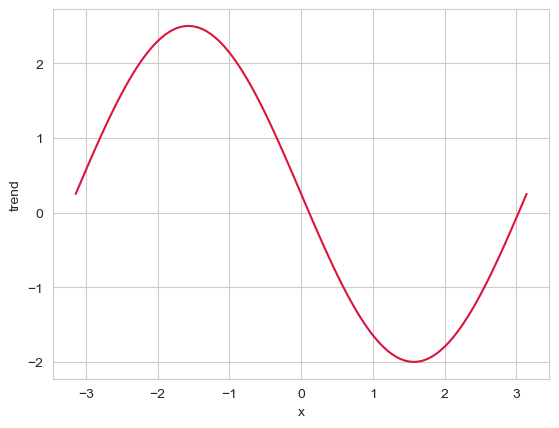

In [7]:
fig, ax = plt.subplots()

ax.plot( df_viz.x, df_viz.trend, color='crimson', linewidth=1.5 )

ax.set_xlabel('x')
ax.set_ylabel('trend')

plt.show()

Remember... there is a linear relationship between the trend and the NON-LINEAR FEATURE!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


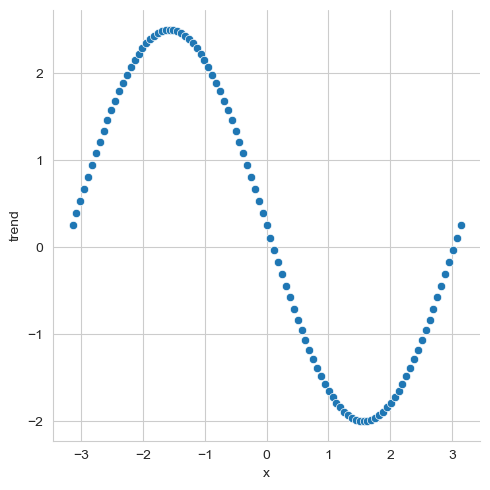

In [8]:
sns.relplot(data = df_viz, x='x', y='trend')

plt.show()

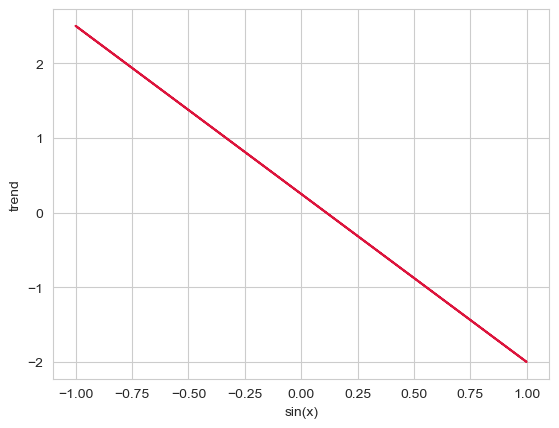

In [9]:
fig, ax = plt.subplots()

ax.plot( np.sin( df_viz.x ), df_viz.trend, color='crimson' )

ax.set_xlabel('sin(x)')
ax.set_ylabel('trend')

plt.show()

Specify the LEVEL OF VARIATION or UNCERTAINTY of a single measurement around the trend.

Last week, we used a SIGMA of 0.1 but this week let's increase it, to 0.33.

In [10]:
my_sigma = 0.33

The output or a SINGLE MEASUREMENT of the OUTPUT is NORMALLY distributed **AROUND** the mean. 

Let's summarize the variation using the 68\% and 95\% uncertainty intervals.

In [11]:
df_viz['obs_lwr_68'] = df_viz.trend - my_sigma
df_viz['obs_upr_68'] = df_viz.trend + my_sigma

In [14]:
df_viz['obs_lwr_95'] = df_viz.trend - 2 * my_sigma
df_viz['obs_upr_95'] = df_viz.trend + 2 * my_sigma

In [15]:
df_viz

,x,trend,obs_lwr_68,obs_upr_68,obs_lwr_95,obs_upr_95
0,-3.141590,0.250006,-0.079994,0.580006,-0.409994,0.910006
1,-3.078758,0.391285,0.061285,0.721285,-0.268715,1.051285
2,-3.015926,0.532005,0.202005,0.862005,-0.127995,1.192005
3,-2.953095,0.671613,0.341613,1.001613,0.011613,1.331613
4,-2.890263,0.809558,0.479558,1.139558,0.149558,1.469558
...,...,...,...,...,...,...
96,2.890263,-0.309558,-0.639558,0.020442,-0.969558,0.350442
97,2.953095,-0.171613,-0.501613,0.158387,-0.831613,0.488387
98,3.015926,-0.032005,-0.362005,0.297995,-0.692005,0.627995
99,3.078758,0.108715,-0.221285,0.438715,-0.551285,0.768715


Visualize the uncertainty of the measurement using ribbons.

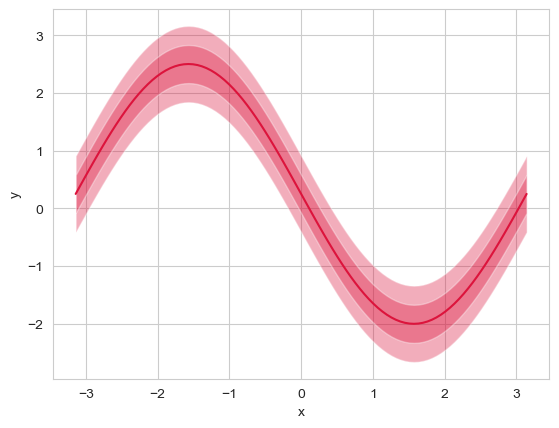

In [20]:
fig, ax = plt.subplots()

# TRUE TREND
ax.plot( df_viz.x, df_viz.trend, color='crimson', linewidth=1.5 )
# variation around the trend - showing 2 intervals
# 2 sigma interval
ax.fill_between( df_viz.x, df_viz.obs_lwr_95, df_viz.obs_upr_95, facecolor='crimson', alpha=0.35 )
# 1 sigma interval
ax.fill_between( df_viz.x, df_viz.obs_lwr_68, df_viz.obs_upr_68, facecolor='crimson', alpha=0.35 )
# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
# show plot
plt.show()

### Generate the RANDOM output data

Generate a small number of random output measurements at given input locations.

We will use more input locations than the linear relationship example.

In [21]:
df = pd.DataFrame({'x': np.linspace(-3, 3, num=15)})

In [23]:
df.head()

,x
0,-3.000000
1,-2.571429
2,-2.142857
3,-1.714286
4,-1.285714


In [24]:
df['trend'] = my_intercept + my_slope * np.sin( df.x )

Initialize the random number generator then call the appropriate generator function.

In [25]:
rg = np.random.default_rng(2100)

In [26]:
df['y'] = rg.normal( loc=df.trend, scale= my_sigma, size = df.shape[0] )

In [27]:
df.head()

,x,trend,y
0,-3.000000,0.567520,0.905523
1,-2.571429,1.464483,0.892371
2,-2.142857,2.141771,2.112304
3,-1.714286,2.476877,2.115940
4,-1.285714,2.409187,2.515115


Visualize the randomly generated outputs around the trend.

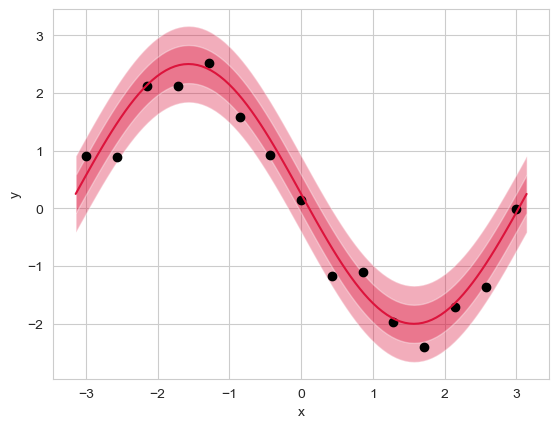

In [28]:
fig, ax = plt.subplots()

# TRUE TREND
ax.plot( df_viz.x, df_viz.trend, color='crimson', linewidth=1.5 )
# variation around the trend - showing 2 intervals
# 2 sigma interval
ax.fill_between( df_viz.x, df_viz.obs_lwr_95, df_viz.obs_upr_95, facecolor='crimson', alpha=0.35 )
# 1 sigma interval
ax.fill_between( df_viz.x, df_viz.obs_lwr_68, df_viz.obs_upr_68, facecolor='crimson', alpha=0.35 )

# include the randomly generated small data
ax.scatter( df.x, df.y, color='k' )

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
# show plot
plt.show()

There is a 68\% chance that 8/15 nodes will be within the inner ribbon

There is a 95\% chance that the nodes will be within the outer ribbon (with a 5\% chance they do not) 

In [29]:
df.y.std()

1.6288504605641019

In [30]:
my_sigma

0.33

Let's save the randomly generated data, and as the previous example: Let's include the true coeffficients and sigma that made the data (constants)

In [31]:
df['true_intercept'] = my_intercept
df['true_slope'] = my_slope
df['true_sigma'] = my_sigma

In [32]:
df.head()

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.000000,0.567520,0.905523,0.25,-2.25,0.33
1,-2.571429,1.464483,0.892371,0.25,-2.25,0.33
2,-2.142857,2.141771,2.112304,0.25,-2.25,0.33
3,-1.714286,2.476877,2.115940,0.25,-2.25,0.33
4,-1.285714,2.409187,2.515115,0.25,-2.25,0.33


In [33]:
df.to_csv('week_10_nonlinear_data.csv', index=False)